In [1]:
import matplotlib.pyplot as plt
from sklearn .datasets import make_moons
from mpl_toolkits.mplot3d import Axes3D

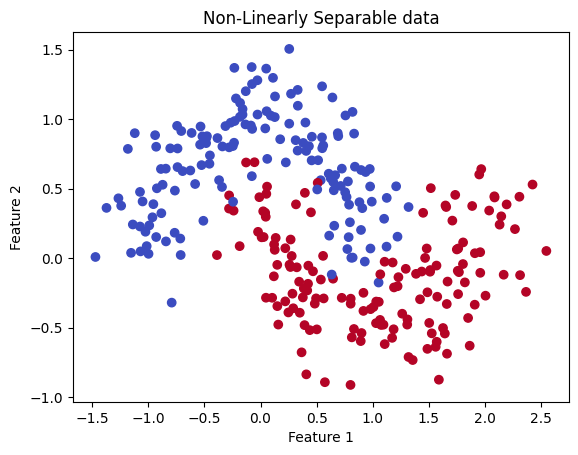

In [2]:
X,Y = make_moons(n_samples=300, noise=0.2 ,random_state=42)

plt.Figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-Linearly Separable data")
plt.show()

In [3]:
import numpy as np

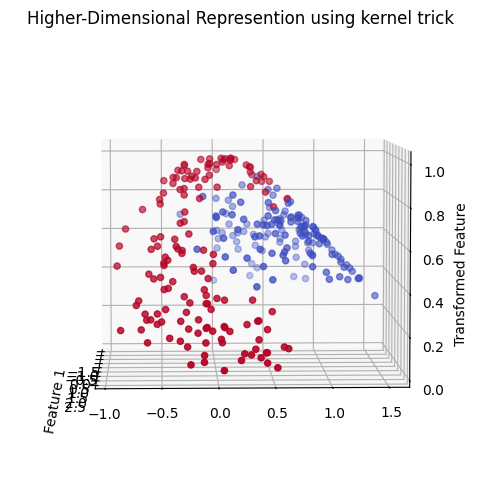

In [4]:
X_transformed = np.exp(-0.5 *(X[:,0]**2 + X[:,1]**2))

fig = plt .figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X_transformed,c=Y,cmap='coolwarm')
ax.set_xlabel("Feature 1")
ax.set_label("Feature 2")
ax.set_zlabel("Transformed Feature")
ax.set_title("Higher-Dimensional Represention using kernel trick")
ax.view_init(elev=5, azim=-2)
plt.show()

In [5]:
from sklearn.datasets import make_classification

In [6]:
X,Y = make_classification(n_samples=1000,n_features=5,random_state=42)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [10]:
from sklearn.svm import SVC

In [11]:
svm_model =SVC(kernel='rbf',C=2.0,gamma='scale')
svm_model.fit(X_train,y_train)

,C,2.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
svm_model.get_params()

{'C': 2.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
y_pred = svm_model.predict(X_test)
 
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Metrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.88
Confusion Metrix:
 [[90  7]
 [17 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        97
           1       0.92      0.83      0.88       103

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid ={
    'C':[0.1,1,10],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto']
}

grid_search = GridSearchCV(SVC(),param_grid,cv=5,scoring ='accuracy')
grid_search.fit(X_train,y_train)

print("Best Parameter:",grid_search.best_params_)
print("Best Cross-Validation Accuracy:",grid_search.best_score_)
best_model = grid_search.best_estimator_

Best Parameter: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8700000000000001


In [29]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

In [30]:

data = load_iris()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)


param_grid = {
    'C': [0.1, 1, 2, 10],      
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


svm_model = SVC(**grid_search.best_params_)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


print("Iris Dataset Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

In [31]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
import seaborn as sns

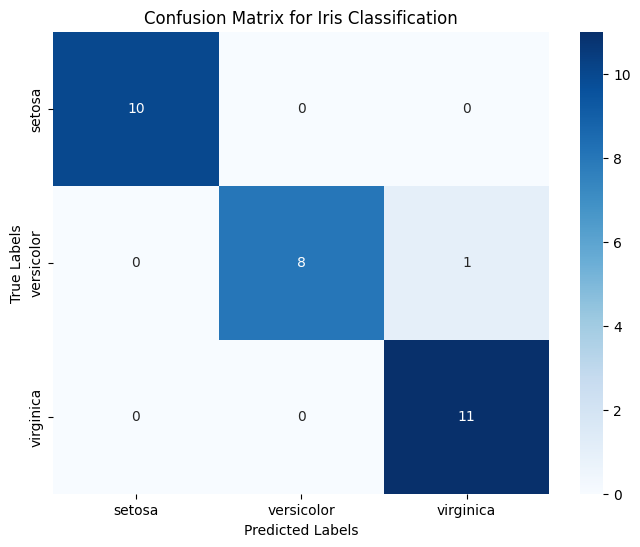

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Iris Classification")
plt.show()


In [35]:
import pickle

In [36]:
iris_classifier_model = (svm_model,scaler)


In [37]:
model_filename ='iris_classifier_model.pkl'
with open(model_filename,'wb') as f:
    pickle.dump(iris_classifier_model,f)

In [39]:
with open("iris_classifier_model.pkl",'rb') as f:
    loaded_model =pickle.load(f)
    

In [40]:
svm_model,scaler=loaded_model

In [41]:
svm_model.predict(np.array([[4,5,6,7]]))

array([2])